<a href="https://colab.research.google.com/github/Igor-R-Amorim/Bot.Camp/blob/main/Relat%C3%B3rio%20Macro-econ%C3%B4mico/C%C3%B3digo_%7C_Relat%C3%B3rio_Macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Relatório de macro-econômia automatizado com Python

* O que o código faz:
<BR>

- Pega os dados
- Trata os dados
- Faz as contas e gera as imagens
- Cria o PDF
- Envia por e-mail
<BR>
Informações que iremos pegar:

* Ibovespa
* S&P500
* Contratos de DI
* Dólar
* Inflação
* Selic

<BR>

Passo a passo:

   - Pegar dados do Ibovespa/S&P500 no yahoo finance.
              - Calcular fechamento do dia, retorno no ano, retorno no mês, volatilidade 12m, retorno mês a mês e plotar gráfico do ativo. 
    - Pegar dados de DI no site da B3.
    - Pegar dados do dólar, inflação e selic no banco central. (3 linhas de código)
    - Criar PDF personalizado.
    - Enviar o e-mail.


O ideal é rodar o programa na parte da manhã, sempre.

# Bibliotecas e Configurações

## Instalações

In [1]:
!pip install html5lib
!pip install webdriver-manager
!pip install python-bcb
!pip install pandas-datareader
!pip install mplfinance
!pip install selenium
!pip install FPDF
!pip install mplcyberpunk
!pip install python-dotenv


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: pandas
    Found existing installat

In [2]:
!pip install pywin32

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pywin32 (from versions: none)
ERROR: No matching distribution found for pywin32


In [3]:
#!pip install fix-yahoo-finance==0.1.30
!pip install --upgrade pandas-datareader
!pip install fix_yahoo_finance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 4.6 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
# Atualizando as ferramentas de dataReader e Yfinance

!pip uninstall yfinance
!pip uninstall pandas-datareader
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas-datareader

Found existing installation: pandas-datareader 0.10.0
Uninstalling pandas-datareader-0.10.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/pandas_datareader-0.10.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/pandas_datareader/*
Proceed (Y/n)? Y
  Successfully uninstalled pandas-datareader-0.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 259.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 299.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 284.2 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting unins

## Importação de bibliotecas


In [5]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr

In [6]:
from datetime import datetime
from datetime import timedelta
import time

In [7]:
import mplfinance as mpf

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplcyberpunk
from matplotlib.dates import date2num

In [8]:
#from selenium.webdriver.firefox.service import Service
#from webdriver_manager.firefox import GeckoDriverManager

from selenium import webdriver
import sys

In [9]:
import yfinance

In [10]:
# bcb = banco central do brasil bibliotecas de API
from bcb import currency
from bcb import sgs

In [11]:
from fpdf import FPDF

In [12]:
import requests
import warnings
warnings.filterwarnings('ignore')

In [13]:
from google.colab import drive

## Configurações

In [14]:
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Configurando navegador para o Google Colab para poder usar a 
# biblioteca Selenium.

!apt-get update # atualizar o ubunto para a correta instalação do apt
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
webdriver.Chrome('chromedriver',options=chrome_options)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,573 kB]
Get:14 http://p

<selenium.webdriver.chrome.webdriver.WebDriver (session="ceb13ab05d2985b0475367fcd4598fe5")>

# Dados Ibovespa e S&P500

In [16]:
yfinance.download(tickers=['^BVSP','^GSPC'], period='1d', interval='1m')

[*********************100%***********************]  2 of 2 completed


Adj Close                       Close               \
                             ^BVSP        ^GSPC          ^BVSP        ^GSPC   
Datetime                                                                      
2023-01-06 09:30:00            NaN  3835.010010            NaN  3835.010010   
2023-01-06 09:31:00            NaN  3834.709961            NaN  3834.709961   
2023-01-06 09:32:00            NaN  3838.409912            NaN  3838.409912   
2023-01-06 09:33:00            NaN  3845.280029            NaN  3845.280029   
2023-01-06 09:34:00            NaN  3848.370117            NaN  3848.370117   
...                            ...          ...            ...          ...   
2023-01-06 15:56:00  108580.812500  3893.469971  108580.812500  3893.469971   
2023-01-06 15:57:00  108596.640625  3892.729980  108596.640625  3892.729980   
2023-01-06 15:58:00  108617.492188  3893.139893  108617.492188  3893.139893   
2023-01-06 15:59:00  108602.312500  3894.199951  108602.312500  3894.199951   
2023-01-06 16:00:00  108963.703125  3895.080078  108963.703125  3895.080078   

                              High                         Low               \
                             ^BVSP        ^GSPC          ^BVSP        ^GSPC   
Datetime                                                                      
2023-01-06 09:30:00            NaN  3837.070068            NaN  3823.370117   
2023-01-06 09:31:00            NaN  3835.989990            NaN  3831.800049   
2023-01-06 09:32:00            NaN  3840.330078            NaN  3833.949951   
2023-01-06 09:33:00            NaN  3845.389893            NaN  3838.179932   
2023-01-06 09:34:00            NaN  3848.629883            NaN  3845.439941   
...                            ...          ...            ...          ...   
2023-01-06 15:56:00  108580.812500  3894.679932  108560.492188  3892.949951   
2023-01-06 15:57:00  108596.890625  3894.360107  108596.640625  3892.090088   
2023-01-06 15:58:00  108617.492188  3893.389893  108609.070312  3891.870117   
2023-01-06 15:59:00  108620.921875  3895.310059  108602.312500  3893.270020   
2023-01-06 16:00:00  108963.703125  3895.080078  108963.703125  3895.080078   

                              Open              Volume              
                             ^BVSP        ^GSPC  ^BVSP       ^GSPC  
Datetime                                                            
2023-01-06 09:30:00            NaN  3823.370117    NaN         0.0  
2023-01-06 09:31:00            NaN  3834.909912    NaN  10427880.0  
2023-01-06 09:32:00            NaN  3834.760010    NaN   9611891.0  
2023-01-06 09:33:00            NaN  3838.189941    NaN   9445981.0  
2023-01-06 09:34:00            NaN  3845.439941    NaN   8885694.0  
...                            ...          ...    ...         ...  
2023-01-06 15:56:00  108560.492188  3894.379883    0.0  17773000.0  
2023-01-06 15:57:00  108596.890625  3893.439941    0.0  22724000.0  
2023-01-06 15:58:00  108609.070312  3892.780029    0.0  27722000.0  
2023-01-06 15:59:00  108620.921875  3893.270020    0.0  55723000.0  
2023-01-06 16:00:00  108963.703125  3895.080078    0.0         0.0  

[391 rows x 12 columns]

In [17]:
# PEGANDO DADOS DO YAHOO FINANCE. 

indices = ['^BVSP', '^GSPC']
#indices = ['WEGE3.SA', 'BBAS3.SA']

hoje = datetime.now()
print(hoje)
um_ano_atras = hoje - timedelta(days = 366) #365 dias ou 366 em ano bisexto
um_ano_atras = '2021-10-12' #fiz assim para ficar igual o exercicio
hoje = '2022-10-13'

#dados_mercado = pdr.get_data_yahoo(indices, start = um_ano_atras, end = hoje)
#dados_mercado = yfinance.download(tickers=indices, period='12mo', interval='1d')
dados_mercado = yfinance.download(tickers=indices, start = um_ano_atras, end = hoje)
display(dados_mercado)

2023-01-08 19:34:35.638235
[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               ^BVSP        ^GSPC     ^BVSP        ^GSPC     ^BVSP   
Date                                                                 
2021-10-12       NaN  4350.649902       NaN  4350.649902       NaN   
2021-10-13  113456.0  4363.799805  113456.0  4363.799805  114159.0   
2021-10-14  113185.0  4438.259766  113185.0  4438.259766  113881.0   
2021-10-15  114648.0  4471.370117  114648.0  4471.370117  114776.0   
2021-10-18  114428.0  4486.459961  114428.0  4486.459961  114927.0   
...              ...          ...       ...          ...       ...   
2022-10-06  117561.0  3744.520020  117561.0  3744.520020  118382.0   
2022-10-07  116375.0  3639.659912  116375.0  3639.659912  117960.0   
2022-10-10  115941.0  3612.389893  115941.0  3612.389893  116841.0   
2022-10-11  114827.0  3588.840088  114827.0  3588.840088  115928.0   
2022-10-12       NaN  3577.030029       NaN  3577.030029       NaN   

                              Low                   Open               \
                  ^GSPC     ^BVSP        ^GSPC     ^BVSP        ^GSPC   
Date                                                                    
2021-10-12  4374.890137       NaN  4342.089844       NaN  4368.310059   
2021-10-13  4372.870117  111807.0  4329.919922  112180.0  4358.009766   
2021-10-14  4439.729980  112708.0  4386.750000  113457.0  4386.750000   
2021-10-15  4475.819824  113049.0  4447.689941  113189.0  4447.689941   
2021-10-18  4488.750000  112841.0  4447.470215  114647.0  4463.720215   
...                 ...       ...          ...       ...          ...   
2022-10-06  3797.929932  117144.0  3739.219971  117200.0  3771.969971   
2022-10-07  3706.739990  115924.0  3620.729980  117560.0  3706.739990   
2022-10-10  3652.169922  115261.0  3588.100098  116377.0  3647.510010   
2022-10-11  3640.659912  114297.0  3568.449951  115928.0  3595.860107   
2022-10-12  3608.340088       NaN  3573.860107       NaN  3590.830078   

                Volume                
                 ^BVSP         ^GSPC  
Date                                  
2021-10-12         NaN  3.558450e+09  
2021-10-13  11732700.0  3.620070e+09  
2021-10-14   8956200.0  3.598280e+09  
2021-10-15  11174900.0  3.819380e+09  
2021-10-18  11201300.0  3.662010e+09  
...                ...           ...  
2022-10-06  14520500.0  4.252100e+09  
2022-10-07  13616500.0  4.449660e+09  
2022-10-10  11429900.0  3.834320e+09  
2022-10-11  13137900.0  4.759030e+09  
2022-10-12         NaN  4.006830e+09  

[260 rows x 12 columns]

In [18]:
# PEGANDO FECHAMENTO AJUSTADO DE CADA ATIVO PARA CALCULAR RENTABILIDADE

dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ["Ibov", "S&P500"]
# a referencia do relatorio é o ibov, portanto vamos descartar os dias que 
# são feriados no brasil o qual o IBOV estava fechado mas o S&P500 estava ativo 
dados_fechamento = dados_fechamento.dropna() 

# outro tratamento possivel seria repetir o fechamento anterior, pois se 
# a bolsa nao abril o fechamento atual é igual ao fechamento anterior.

dados_fechamento

,Ibov,S&P500
Date,,
2021-10-13,113456.0,4363.799805
2021-10-14,113185.0,4438.259766
2021-10-15,114648.0,4471.370117
2021-10-18,114428.0,4486.459961
2021-10-19,110673.0,4519.629883
...,...,...
2022-10-05,117198.0,3783.280029
2022-10-06,117561.0,3744.520020
2022-10-07,116375.0,3639.659912


In [19]:
# PEGANDO FECHAMENTO MENSAL E ANUAL PARA CALCULAR RENTABILIDADES

dados_anuais = dados_fechamento.resample("Y").last()
display(dados_anuais)

print()
print('---            ---             ---')
print()
dados_mensais = dados_fechamento.resample("M").last()
display(dados_mensais)

,Ibov,S&P500
Date,,
2021-12-31,104822.0,4778.729980
2022-12-31,114827.0,3588.840088



---            ---             ---



,Ibov,S&P500
Date,,
2021-10-31,103501.0,4605.379883
2021-11-30,101915.0,4567.000000
2021-12-31,104822.0,4778.729980
2022-01-31,112388.0,4515.549805
2022-02-28,113142.0,4384.649902
2022-03-31,119999.0,4530.410156
2022-04-30,107876.0,4131.930176
2022-05-31,111351.0,4132.149902
2022-06-30,98542.0,3785.379883


In [20]:
# CALCULANDO RENTABILIDADES

# Vamos dar o dropna pois no primeiro dia o a percentagem de rentabilidade é 0
retorno_diario = dados_fechamento.pct_change().dropna()
display(retorno_diario)

# Com o '.iloc' retiramos a linha '0' da contagem para não apresentar 
# o retorno do mes de outubro, visto que ele seria o primeiro mes investido
retorno_mes_a_mes = dados_mensais.pct_change().dropna()
retorno_mes_a_mes = retorno_mes_a_mes.iloc[1: , :]
display(retorno_mes_a_mes)

retorno_no_ano = dados_anuais.pct_change().dropna()
display(retorno_no_ano)

,Ibov,S&P500
Date,,
2021-10-14,-0.002389,0.017063
2021-10-15,0.012926,0.007460
2021-10-18,-0.001919,0.003375
2021-10-19,-0.032815,0.007393
2021-10-20,0.001021,0.003664
...,...,...
2022-10-05,0.008328,-0.002018
2022-10-06,0.003097,-0.010245
2022-10-07,-0.010088,-0.028004


,Ibov,S&P500
Date,,
2021-12-31,0.028524,0.046361
2022-01-31,0.072180,-0.055073
2022-02-28,0.006709,-0.028989
2022-03-31,0.060605,0.033243
2022-04-30,-0.101026,-0.087957
2022-05-31,0.032213,0.000053
2022-06-30,-0.115033,-0.083920
2022-07-31,0.046914,0.091116
2022-08-31,0.061629,-0.042440


,Ibov,S&P500
Date,,
2022-12-31,0.095448,-0.248997


In [21]:
# FECHAMENTO DE DIA

# Pegando o retorno_dia ao contrario, isso é o primeiro item de trás pra frente
fechamento_de_dia = retorno_diario.iloc[-1, :]

display(fechamento_de_dia)

Ibov     -0.009608
S&P500   -0.006519
Name: 2022-10-11 00:00:00, dtype: float64

In [22]:
# VOLATILIDADE ibov e S&P500

# Volatilidade de um ativo, nada mais é que o desvio padrao do movimento
# desse ativo, que no NumPy nada mais é que a função .std (Standard Deviation)
# Multiplicado pela raiz do periodo decorrido.
# ex: volatilidade_anual = Desvio_mensal/sqrt(12)
# como o ano tem 252 dias úteis, faremos: 

volatilidade_12m_ibov = retorno_diario['Ibov'].std() * np.sqrt(252)
volatilidade_12m_sp = retorno_diario['S&P500'].std() * np.sqrt(252)

print(volatilidade_12m_ibov)
print(volatilidade_12m_sp)

0.20461511961493806
0.228170579174551


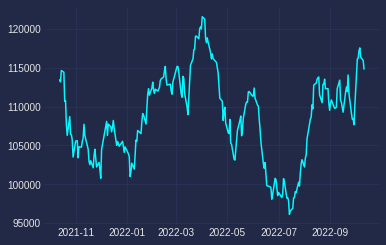

In [24]:
from pyparsing.helpers import White
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(dados_fechamento.index, dados_fechamento['Ibov'])
ax.grid(True)
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.savefig('ibov.png', dpi = 600)

plt.show()


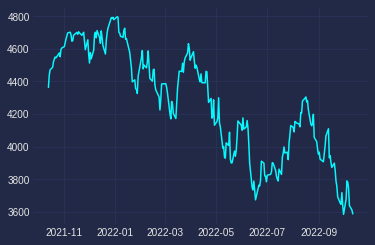

In [25]:
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(dados_fechamento.index, dados_fechamento['S&P500'])
ax.grid(True)
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.savefig('sp.png', dpi = 600)

plt.show()

# Dados DI

https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data=07/10/2019&Mercadoria=DI1

In [26]:
dados_fechamento

,Ibov,S&P500
Date,,
2021-10-13,113456.0,4363.799805
2021-10-14,113185.0,4438.259766
2021-10-15,114648.0,4471.370117
2021-10-18,114428.0,4486.459961
2021-10-19,110673.0,4519.629883
...,...,...
2022-10-05,117198.0,3783.280029
2022-10-06,117561.0,3744.520020
2022-10-07,116375.0,3639.659912


In [27]:
# PEGANDO OS DIAS ÚTEIS PARA JOGAR NO URL DE FORMA VALIDA

data_inicial = dados_fechamento.index[0]

# apos as 10 da manha o mercado esta aberto entao temos que pegar 
# o dia anterior.
if datetime.now().hour < 10:
  data_final = dados_fechamento.index[-1]
else:
  data_final = dados_fechamento.index[-2]
print(data_inicial)

# o formato de datetime nao atende o necessario no url, portanto vamos 
# re-formatar a string para o formato desejado.
data_inicial = data_inicial.strftime("%d/%m/%Y")
data_final = data_final.strftime("%d/%m/%Y")
print(data_inicial)


url_mais_att = f'''http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?
pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={data_final}
&Mercadoria=DI1'''

url_mais_antiga = f'''http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?
pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={data_inicial}
&Mercadoria=DI1'''

url_mais_antiga

2021-10-13 00:00:00
13/10/2021


'http://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?\npagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data=13/10/2021\n&Mercadoria=DI1'

In [28]:
# Função para pegar os elementos especificos do endereco que vai variar a data
# no url que sera passado como parametro para a função. Essa função retorna 
# para a gente 2 dataframes (DF), um com os dados e outro com o indice.

def pegando_dados_di(url):  
  driver = webdriver.Chrome('chromedriver', options=chrome_options)
  #driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()))
    
  sem_conexao = True
  while sem_conexao:
    try:
      driver.get(url)
      sem_conexao = False
    except:
      pass
            
  local_tabela = '''
  //div[@id = "containerPop"]//div[@id = "pageContent"]//form//table//tbody//tr[3]//td[3]//table
  '''

  local_indice = '''
  //div[@id = "containerPop"]//div[@id = "pageContent"]//form//table//tbody//tr[3]//td[1]//table
  '''

  elemento = driver.find_element("xpath", local_tabela)
  elemento_indice = driver.find_element("xpath", local_indice)
  html_tabela = elemento.get_attribute('outerHTML')
  html_indice = elemento_indice.get_attribute('outerHTML')

  driver.quit()

  tabela = pd.read_html(html_tabela)[0]
  indice = pd.read_html(html_indice)[0]

  return tabela, indice

In [29]:
# Executando a função anterior nos 2 periodos.

di_mais_recente, indice_di_mais_recente = pegando_dados_di(url = url_mais_att)

di_mais_antigo, indice_di_mais_antigo = pegando_dados_di(url = url_mais_antiga)

In [30]:
display(di_mais_recente)
display(indice_di_mais_recente)

,0,1,2,3,4,5,6,7,8,9,10
0,AJUSTE ANTER. (3),AJUSTE CORRIG. (4),PREÇO ABERT.,PREÇO MÍN.,PREÇO MÁX.,PREÇO MÉD.,ÚLT. PREÇO,AJUSTE,VAR. PTOS.,ÚLT. OF. COMPRA,ÚLT. OF. VENDA
1,"99.240,70","99.240,70",13660,13654,13660,13657,13658,"99.240,95","0,25+",13654,13658
2,"98.235,84","98.235,84",13660,13660,13676,13668,13662,"98.236,17","0,33+",13662,13674
3,"97.141,78","97.141,78",13682,13670,13686,13675,13674,"97.142,66","0,88+",13674,13678
4,"96.057,94","96.057,94",13685,13680,13690,13685,13680,"96.060,20","2,26+",13675,13690
5,"95.185,98","95.185,98",13680,13665,13680,13676,13665,"95.189,30","3,32+",13665,0000
6,"94.072,99","94.072,99",13685,13670,13685,13678,13670,"94.079,04","6,05+",13665,13670
7,"93.230,62","93.230,62",13670,13650,13670,13660,13670,"93.226,15","4,47-",0000,0000
8,"92.217,43","92.217,43",13605,13595,13605,13604,13595,"92.217,83","0,40+",0000,0000
9,"91.286,07","91.286,07",13505,13500,13530,13515,13505,"91.297,27","11,20+",13505,13510


,0
0,VENCTO
1,X22
2,Z22
3,F23
4,G23
5,H23
6,J23
7,K23
8,M23
9,N23


In [31]:
# driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()))

# sem_conexao = True
    
# while sem_conexao:
#         try:
#             driver.get(url_mais_att)
#             sem_conexao = False
#         except:
#             pass
            

# local_tabela = '''//div[@id = "containerPop"]//div[@id = "pageContent"]
# //form//table//tbody//tr[3]//td[3]//table'''

# elemento = driver.find_element("xpath", local_tabela)

# html_tabela = elemento.get_attribute('outerHTML')

# html_tabela

# driver.quit()

# tabela = pd.read_html(html_tabela)[0]

# tabela

In [32]:
def tratando_dados_di(df_dados, indice):
  df_dados.columns = df_dados.loc[0]
  df_dados = df_dados['ÚLT. PREÇO'] # Peguei apenas a coluna de interesse
  df_dados = df_dados.drop(0, axis = 0) # Dropando indice

  indice.columns = indice.loc[0]
  indice_di = indice['VENCTO'] # tb peguei apenas a coluna de interesse
  indice = indice.drop(0, axis = 0) # tb dropamos o indice
  df_dados.index = indice['VENCTO'] # atribui a coluna vencimento do DF indice ao index do df_dados

  print(df_dados)

  df_dados = df_dados.astype(int) # os valores não vem numericos, portanto sera necessario converte-los
  df_dados = df_dados[df_dados != 0] # removendo as linhas onde os dados==0 
  df_dados = df_dados/1000 # transformando em decimal
  print(df_dados)
  return df_dados

In [33]:
dados_di_recente_tratado = tratando_dados_di(di_mais_recente, indice_di_mais_recente)

dados_di_antigo_tratado = tratando_dados_di(di_mais_antigo, indice_di_mais_antigo)

VENCTO
X22    13658
Z22    13662
F23    13674
G23    13680
H23    13665
J23    13670
K23    13670
M23    13595
N23    13505
Q23    13410
U23    13250
V23    13120
F24    12705
J24    12340
N24    11965
V24    11710
F25    11475
J25    11385
N25    11330
V25    11325
F26    11320
J26    11325
N26    11330
V26    11330
F27    11320
J27    11335
N27    11345
V27    11420
F28    11360
F29    11480
F30    11520
F31    11560
F32    11550
F33    11590
F34     0000
F35     0000
F36    11620
F37     0000
Name: ÚLT. PREÇO, dtype: object
VENCTO
X22    13.658
Z22    13.662
F23    13.674
G23    13.680
H23    13.665
J23    13.670
K23    13.670
M23    13.595
N23    13.505
Q23    13.410
U23    13.250
V23    13.120
F24    12.705
J24    12.340
N24    11.965
V24    11.710
F25    11.475
J25    11.385
N25    11.330
V25    11.325
F26    11.320
J26    11.325
N26    11.330
V26    11.330
F27    11.320
J27    11.335
N27    11.345
V27    11.420
F28    11.360
F29    11.480
F30    11.520
F31    11.560
F32    11.55

In [34]:
dados_di_antigo_tratado

VENCTO
X21     6.304
Z21     6.860
F22     7.304
G22     7.580
H22     7.830
J22     8.050
K22     8.235
M22     8.425
N22     8.580
Q22     8.685
U22     8.780
V22     8.875
X22     8.935
Z22     8.980
F23     9.060
J23     9.245
N23     9.460
V23     9.595
F24     9.700
N24     9.895
V24     9.960
F25    10.010
J25    10.060
N25    10.120
V25    10.190
F26    10.250
J26    10.260
F27    10.440
F28    10.580
F29    10.700
F31    10.850
F33    11.000
Name: ÚLT. PREÇO, dtype: float64

In [35]:
# Criando um tradutor para o indice, de forma que consigamos encaixar 
# em um formato de datetipe, posteriormente na função 

legenda = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    index = ['F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z'])

legenda
legenda["F"]

def transformando_codigo_em_data(df):
  lista_datas = []
  for indice in df.index:
    letra = indice[0]
    ano = indice[1:3]
    mes = legenda[letra]
    data = f"{mes}-{ano}"
    data = datetime.strptime(data, "%b-%y")
    lista_datas.append(data)

  df.index = lista_datas    
  return df

In [36]:
dados_di_recente_tratado = transformando_codigo_em_data(dados_di_recente_tratado)
dados_di_antigo_tratado = transformando_codigo_em_data(dados_di_antigo_tratado)

dados_di_recente_tratado

2022-11-01    13.658
2022-12-01    13.662
2023-01-01    13.674
2023-02-01    13.680
2023-03-01    13.665
2023-04-01    13.670
2023-05-01    13.670
2023-06-01    13.595
2023-07-01    13.505
2023-08-01    13.410
2023-09-01    13.250
2023-10-01    13.120
2024-01-01    12.705
2024-04-01    12.340
2024-07-01    11.965
2024-10-01    11.710
2025-01-01    11.475
2025-04-01    11.385
2025-07-01    11.330
2025-10-01    11.325
2026-01-01    11.320
2026-04-01    11.325
2026-07-01    11.330
2026-10-01    11.330
2027-01-01    11.320
2027-04-01    11.335
2027-07-01    11.345
2027-10-01    11.420
2028-01-01    11.360
2029-01-01    11.480
2030-01-01    11.520
2031-01-01    11.560
2032-01-01    11.550
2033-01-01    11.590
2036-01-01    11.620
Name: ÚLT. PREÇO, dtype: float64

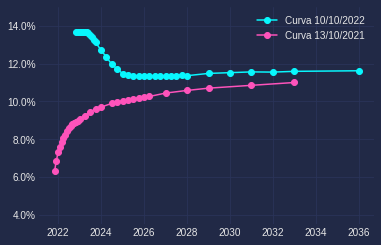

In [37]:
fig, ax = plt.subplots()
plt.style.use("cyberpunk")

ax.set_ylim(3.5, 15)

ax.plot(dados_di_recente_tratado.index, dados_di_recente_tratado.values, 
        label = f"Curva {data_final}", marker='o')

ax.plot(dados_di_antigo_tratado.index, dados_di_antigo_tratado.values, 
        label = f"Curva {data_inicial}", marker='o')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
ax.grid(True)
plt.savefig('juros.png', dpi = 300)

plt.show()

# Dados do Banco Central (Selic, Inflação e Dólar)

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
<br>
https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json

In [38]:
hoje = datetime.now()
hoje

datetime.datetime(2023, 1, 8, 19, 36, 6, 384805)

In [39]:
#série selic
cinco_anos_atras = hoje - timedelta(days = 1826.0)
cinco_anos_atras = cinco_anos_atras.strftime('%Y-%m-%d')
hoje = hoje.strftime('%Y-%m-%d')
selic = sgs.get({'selic':432}, start = cinco_anos_atras)

selic

,selic
Date,
2018-01-08,7.00
2018-01-09,7.00
2018-01-10,7.00
2018-01-11,7.00
2018-01-12,7.00
...,...
2023-01-04,13.75
2023-01-05,13.75
2023-01-06,13.75


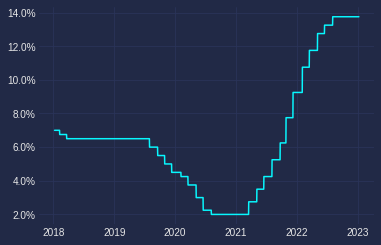

In [40]:
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(True)
plt.savefig('selic.png', dpi = 300)

plt.show()

In [41]:
# Série do IPCA e IGP-M
inflacao = sgs.get({'ipca': 433,
                    'igp-m': 189}, start = um_ano_atras)

inflacao

,ipca,igp-m
Date,,
2021-10-01,1.25,0.64
2021-11-01,0.95,0.02
2021-12-01,0.73,0.87
2022-01-01,0.54,1.82
2022-02-01,1.01,1.83
2022-03-01,1.62,1.74
2022-04-01,1.06,1.41
2022-05-01,0.47,0.52
2022-06-01,0.67,0.59


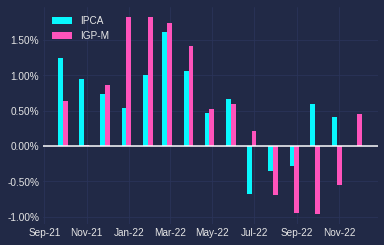

In [42]:
datas_numericas = date2num(inflacao.index)

fig, ax = plt.subplots()

ax.bar(datas_numericas-7, inflacao['ipca'], label = "IPCA", width=7)
ax.bar(datas_numericas, inflacao['igp-m'], label = "IGP-M", width=7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(True)
plt.axhline(y=0, color = 'w')
plt.legend()
plt.savefig('inflacao.png', dpi = 300)

plt.show()

In [43]:
# Importas moedas 

dolar = currency.get('USD', start=um_ano_atras, end=datetime.now())
dolar

,USD
Date,
2021-10-13,5.5471
2021-10-14,5.4988
2021-10-15,5.4510
2021-10-18,5.5193
2021-10-19,5.5521
...,...
2023-01-02,5.3436
2023-01-03,5.3759
2023-01-04,5.4459


In [44]:
dolar_mensal = dolar.resample("M").last()
dolar_anual = dolar.resample("Y").last()

In [45]:
#calculando rentabilidades

dolar_diario = dolar.pct_change().dropna()
fechamento_de_dia_dolar = dolar_diario.iloc[-1, :]

display(fechamento_de_dia_dolar)

retorno_mes_a_mes_dolar = dolar_mensal.pct_change().dropna()
retorno_mes_a_mes_dolar = retorno_mes_a_mes_dolar.iloc[1: , :]

display(retorno_mes_a_mes_dolar)

retorno_no_ano_dolar = dolar_anual.pct_change().dropna()

display(retorno_no_ano_dolar)

USD   -0.021675
Name: 2023-01-06 00:00:00, dtype: float64

,USD
Date,
2021-12-31,-0.007011
2022-01-31,-0.039978
2022-02-28,-0.040691
2022-03-31,-0.078141
2022-04-30,0.038267
2022-05-31,-0.038666
2022-06-30,0.107657
2022-07-31,-0.009469
2022-08-31,-0.001812


,USD
Date,
2022-12-31,-0.065012
2023-12-31,0.012994


In [46]:
#Volatilidade dolar

volatilidade_12m_dolar = dolar_diario['USD'].std() * np.sqrt(252)

volatilidade_12m_dolar

0.15649603855562147

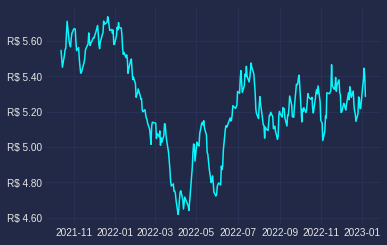

In [47]:
from matplotlib import ticker
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(dolar.index, dolar['USD'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x: 1.2f}"))
ax.grid(True)
plt.savefig('dolar.png', dpi = 300)

plt.show()

# Criar PDF

In [48]:
fechamento_de_dia
# volatilidade_12m_ibov
# volatilidade_12m_sp
# retorno_mes_a_mes
# retorno_no_ano
# fechamento_de_dia_dolar
# retorno_mes_a_mes_dolar
# retorno_no_ano_dolar

Ibov     -0.009608
S&P500   -0.006519
Name: 2022-10-11 00:00:00, dtype: float64

In [49]:
meses = []

for indice in retorno_mes_a_mes.index:
  mes = indice.strftime("%b")  
  meses.append(mes)
    
meses

['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [50]:
class PDF(FPDF):
    
    def header(self):
        self.image('/content/drive/MyDrive/Colab Notebooks/BOT.Camp/logo.png', 10, 8, 40)
        self.set_font('Arial', 'B', 20)
        self.ln(15)
        self.set_draw_color(35, 155, 132) #cor RGB
        self.cell(15, ln = False)
        self.cell(150, 15, f"Relatório de mercado {data_final}", 
                  border = True, ln = True, align = "C")
        self.ln(5)
        
    def footer(self): #rodapé
        self.set_y(-15) #espaço ate o final da folha
        self.set_font('Arial', 'I', 10)
        self.cell(0, 10, f"{self.page_no()}/{{nb}}", align = "C") #contagem de pagina

In [51]:
#Definindo config básicas do PDF

pdf = PDF("P", "mm", "Letter")
pdf.set_auto_page_break(auto = True, margin = 15)
pdf.alias_nb_pages()
pdf.add_page()
pdf.set_fill_color(255, 255, 255)
pdf.set_draw_color(35, 155, 132)

#pdf.output('aula2.pdf')

In [52]:
pdf.image('/content/drive/MyDrive/Colab Notebooks/BOT.Camp/nave1.png', x = 115, y = 70, w = 75, h = 33)
pdf.set_font('Arial', 'B', 18)
pdf.cell(0, 10, "1 - Ações e câmbio", ln = True,  border = False, fill = False)
pdf.ln(2)

pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "1.1 Fechamento do mercado", ln = True,  border = False, fill = True)

pdf.ln(7)

#pdf.output('aula2.pdf')

In [53]:
#fechamento ibov
pdf.set_font('Arial', '', 13)
pdf.cell(25, 15, " Ibovespa", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(fechamento_de_dia[0] * 100, 2))}%", ln = True, 
         border = True, fill = False)

#fechamento s&p500
pdf.cell(25, 15, " S&P500", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(fechamento_de_dia[1] * 100, 2))}%", ln = True,  border = True, fill = False)

#fechamento Dólar
pdf.cell(25, 15, " Dólar", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(fechamento_de_dia_dolar[0] * 100, 2))}%", ln = True,  border = True, fill = False)

pdf.ln(7)

#pdf.output('aula2.pdf')

In [54]:
#imagens
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.2 Gráficos Ibovespa, S&P500 e Dólar", ln = True,  border = False, fill = False)

pdf.cell(95, 15, "Ibovespa", ln = False,  border = False, fill = False, align = "C")
pdf.cell(100, 15, "S&P500", ln = True,  border = False, fill = False, align = "C")
pdf.image("ibov.png", w = 80, h = 70, x = 20, y = 160)
pdf.image("sp.png", w = 80, h = 70, x = 115, y = 160)

pdf.ln(130)

pdf.cell(0, 15, "Dólar", ln = True,  border = False, fill = False, align = "C")
pdf.image("dolar.png", w = 100, h = 75, x = 58)


pdf.ln(2)

#pdf.output('aula2.pdf')

In [55]:
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.3 Rentabilidade mês a mês", ln = True,  border = False, fill = False)


#escrevendo os meses
pdf.cell(17, 10, "", ln = False,  border = False, fill = True, align = "C")

for mes in meses:
    
    pdf.cell(16, 10, mes, ln = False,  border = True, fill = True, align = "C")


pdf.ln(10)

#pdf.output('aula2.pdf')

In [56]:
#escrevendo o ibov

pdf.cell(17, 10, "Ibov", ln = False,  border = True, fill = True, align = "C")

pdf.set_font('Arial', '', 12)
for rent in retorno_mes_a_mes['Ibov']:
    
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")

pdf.ln(10)

#escrevendo o S&P

pdf.cell(17, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")

pdf.set_font('Arial', '', 12)
for rent in retorno_mes_a_mes['S&P500']:
    
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")

pdf.ln(10)

#escrevendo o Dólar

pdf.cell(17, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")

pdf.set_font('Arial', '', 12)
for rent in retorno_mes_a_mes_dolar['USD']:
    
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")

pdf.ln(10)

#pdf.output('aula2.pdf')

In [57]:
#rent anual
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.4 Rentabilidade no ano", ln = True,  border = False, fill = False)

#rent anual ibov
pdf.set_font('Arial', '', 13)
pdf.cell(25, 10, "Ibovespa", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(retorno_no_ano.iloc[0, 0] * 100, 2))}%", ln = True,  border = True, align = "C")

#rent anual S&P
pdf.cell(25, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(retorno_no_ano.iloc[0, 1] * 100, 2))}%", ln = True,  border = True, align = "C")

#rent anual Dólar
pdf.cell(25, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(retorno_no_ano_dolar.iloc[0, 0] * 100, 2))}%", ln = True,  border = True, align = "C")


pdf.ln(20)


#pdf.output('aula2.pdf')

In [58]:
#volatilidade
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.5 Volatilidade 12M", ln = True,  border = False, fill = False)

#vol ibov
pdf.set_font('Arial', '', 13)
pdf.cell(25, 10, "Ibovespa", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatilidade_12m_ibov * 100, 2))}%", ln = True,  border = True, align = "C")

#vol s&p500
pdf.cell(25, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatilidade_12m_sp * 100, 2))}%", ln = True,  border = True, align = "C")

#vol dolar
pdf.cell(25, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatilidade_12m_dolar * 100, 2))}%", ln = True,  border = True, align = "C")

pdf.image('/content/drive/MyDrive/Colab Notebooks/BOT.Camp/nave2.png', x = 115, y = 45, w = 70, h = 70, type = '', link = '')

pdf.ln(7)

#pdf.output('aula2.pdf')

In [59]:
pdf.set_font('Arial', 'B', 18)
pdf.cell(0, 15, "2 - Dados econômicos", ln = True,  border = False, fill = False)

pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "2.1 Curva de juros", ln = True,  border = False, fill = False)
pdf.image("juros.png", w = 125, h = 100, x = 40, y = 140)

pdf.ln(135)

pdf.cell(0, 15, "2.2 Inflacão", ln = True,  border = False, fill = False)
pdf.image("inflacao.png", w = 110, h = 90, x = 40)


pdf.cell(0, 15, "2.3 Selic", ln = True,  border = False, fill = False)
pdf.image("selic.png", w = 110, h = 90, x = 40)

pdf.output('aula2.pdf')

''

# Enviando email via SMTP

In [60]:
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 

In [62]:
fromaddr = "igor.teste.python@gmail.com"
toaddr = "igor.amorim.182@outlook.com"
   
msg = MIMEMultipart() 
msg['From'] = fromaddr 
msg['To'] = toaddr 
msg['Subject'] = "Relatório diário"
body = '''Segue em anexo o relatório diário.

Abs, Igor

'''
msg.attach(MIMEText(body, 'plain')) 
filename = "aula2.pdf"
attachment = open("/content/aula2.pdf", "rb") 
p = MIMEBase('application', 'octet-stream') 
p.set_payload((attachment).read()) 
encoders.encode_base64(p) 
   
p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
msg.attach(p) 
s = smtplib.SMTP('smtp.gmail.com', 587) 
s.starttls() 
# Para essa etapa, sera necessario habilitar Palavras-passe de aplicações 
# siga: https://support.google.com/accounts/answer/185833?visit_id=638088041088808092-3467428947&p=InvalidSecondFactor&rd=1
s.login(fromaddr, "cits????????bybn") #"Password_of_the_sender" 
text = msg.as_string() 
s.sendmail(fromaddr, toaddr, text) 
s.quit() 

(221,
 b'2.0.0 closing connection p8-20020a170902e74800b00176dc67df44sm4504932plf.132 - gsmtp')

# Enviando Email via Windows

* Pode colocar maiores altas do mercado
* Pode pegar dados da economia americana direto do FRED com 1 linha de código e inserir
* Pode pegar dados da CVM de balanço e colocar quais empresas reportaram resultado na semana
* Pode colocar sua carteira pessoal e comparar com os benchmarks (projeto mais complexo envolvendo banco de dados, leitura de notas, etc)

In [ ]:
!pip install pywin32

In [ ]:
import win32com.client as win32

In [ ]:
#integração com seu outlook
outlook = win32.Dispatch('outlook.application')

In [ ]:
#criar email
email = outlook.CreateItem(0)

In [ ]:
email.To = "botcamp@edufinance.com.br"
email.Subject = "Relatório diário"
email.Body = '''Segue em anexo o relatório diário.

Abs, Brenno

'''

anexo = r"C:/Users/lsiqu/lancamento_2-main/aula2.pdf"

email.Attachments.Add(anexo)

email.Send()
